<a href="https://colab.research.google.com/github/moralesluis26/Car_price_prediction/blob/main/02-Modelos_predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Preparación de datos**

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download hellbuoy/car-price-prediction

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 10.7MB/s]


In [6]:
! unzip car-price-prediction.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [7]:
import pandas as pd
import numpy as np
! pip install pd
di= pd.read_csv("CarPrice_Assignment.csv")
df = di.copy()
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#Librerias machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error , mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc
#Algunas librerias de utilidad

In [9]:
dt=df.copy()

In [10]:
sig_cat_col = ['fueltype','carbody','drivewheel','enginetype','cylindernumber']

In [11]:
dummies = pd.get_dummies(df[sig_cat_col])


In [12]:
sig_cat_col_f = ['car_ID','fueltype','carbody','drivewheel','enginetype','cylindernumber','symboling','aspiration','drivewheel','fuelsystem','doornumber','carheight','stroke','compressionratio','peakrpm','citympg','highwaympg','CarName','enginelocation']
#Se eliminan algunas columnas que contienen información que es muy específica y no aporta mucho a la predicción y otras que no tiene una relación directa con la variable 'price'.

In [13]:
df_car = pd.concat([dt, dummies], axis = 1)
df_car.drop( (sig_cat_col_f), axis = 1, inplace = True)
df_car.shape

(205, 32)

In [14]:
df_c=df_car.copy()

In [15]:
cols= ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price']

In [16]:
scaler = preprocessing.StandardScaler()
import warnings
warnings.filterwarnings("ignore")
df_c[cols] = scaler.fit_transform(df_c[cols])
#Normalización de las columnas 


In [17]:
cols= ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','carbody_hatchback' ,'enginetype_ohcv','price']

In [18]:
ds=df_c.copy()
ds=ds[cols]
 # Este es el df normalizado que servirá para realizar los modelos 

In [19]:
ds2=df_car[cols]
# Este es el df sin normalizar que servirá para realizar los modelos 

# 2. Modelos supervisados.

In [20]:
def RMSLE(y_actual, y_pred):
    
    return np.sqrt(mean_squared_error(y_actual, y_pred))

In [21]:
def rel_mrae(estimator, X, y):
    preds = estimator.predict(X)
    return np.mean(np.abs(preds-y)/y)

2.1 Test de modelos con datos normalizados.

In [22]:
X1=ds.copy()

In [23]:
y1 = X1.pop('price')

In [24]:
#--------Partición de los datos normalizados------------

from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación


print (X1.shape, y1.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

Xtr, Xts, ytr, yts = train_test_split(X1, y1, test_size=test_size)
print (Xtr.shape, Xts.shape)

(205, 9) (205,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(143, 9) (62, 9)


In [25]:
def report_cv_score(z):
    
    #RMSE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_rmse_ts = np.sqrt(lr_ts_score)
    lin_rmse_tr = np.sqrt(lr_tr_score)
    print("RMSLE Test: ", "{:.5f}".format(np.mean(lin_rmse_ts)), "(±", "{:.8f}".format(np.std(lin_rmse_ts)),")")
    print("RMSLE Train: ", "{:.5f}".format(np.mean(lin_rmse_tr)), "(±", "{:.8f}".format(np.std(lin_rmse_tr)),")")

In [26]:
estimator1 = LinearRegression()
estimator2 = DecisionTreeRegressor(max_depth=5)
estimator3 = RandomForestRegressor(n_estimators = 2,max_depth = 5)

In [27]:
test_size = 0.3
val_size= test_size/(1-test_size)
zscores = []
estimators = [estimator1, estimator2, estimator3]
for estimator in estimators:
    print("---------")
    z = cross_validate(estimator, Xtr, ytr, return_train_score=True, return_estimator=False,
                       scoring="neg_mean_squared_error", cv=ShuffleSplit(n_splits=10, test_size=val_size))
    report_cv_score(z)
    zscores.append(np.mean(np.sqrt(z['test_score']*(-1))))
best = np.argmin(zscores)
print ("Seleccionado: ", best)
best_estimator = estimators[best]
print ("\n Mejor modelo: ")
print (best_estimator)

---------
RMSLE Test:  0.46486 (± 0.06321956 )
RMSLE Train:  0.35975 (± 0.02711306 )
---------
RMSLE Test:  0.43330 (± 0.16244402 )
RMSLE Train:  0.11328 (± 0.01529450 )
---------
RMSLE Test:  0.39326 (± 0.09520106 )
RMSLE Train:  0.24955 (± 0.05529508 )
Seleccionado:  2

 Mejor modelo: 
RandomForestRegressor(max_depth=5, n_estimators=2)


De los modelos implementados, se puede observar que los que poseen mejor desempeño haciendo uso de la métrica RMSE son el modelo DecisionTreeRegressor y RandomForestRegressor.

2.2 Selección de hiperparámetros para el modelo DecisionTreeRegressor


In [28]:
def RMSLE(estimator, X,y):
    preds = estimator.predict(X)
    return np.sqrt(mean_squared_log_error(y, preds))

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
X=ds2.copy()

In [31]:
y = X.pop('price')

In [32]:
#--------Partición de los datos sin normalizar------------

from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación


print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtr, ytr son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
print (Xtr.shape, Xts.shape)

(205, 9) (205,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(143, 9) (62, 9)


In [33]:
#Esta celda puede tomar un tiempo considerable en su ejecución
parametros = {'max_depth': [2,5,11,17]}


decission_tree = GridSearchCV(estimator = estimator2,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 10, test_size=val_size), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

decission_tree.fit(Xtr, ytr)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=DecisionTreeRegressor(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 11, 17]}, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
print("Mejor estimador Decision Tree: ",decission_tree.best_estimator_)
print("Mejores parámetros para el estimador Decision Tree: ", decission_tree.best_params_)

Mejor estimador Decision Tree:  DecisionTreeRegressor(max_depth=5)
Mejores parámetros para el estimador Decision Tree:  {'max_depth': 5}


Implementación de los mejores parámetros con el modelo Desicion Tree:

In [35]:
Des_tree = DecisionTreeRegressor(max_depth=15)
Des_tree.fit(Xtr, ytr)

DecisionTreeRegressor(max_depth=15)

In [36]:
print('RMSLE del Decision Tree en entrenamiento: ',"{:.5f}".format(RMSLE(Des_tree,Xtr, ytr)))
print('RMSLE del Decision Tree seleccionado: ',"{:.5f}".format(RMSLE(Des_tree,Xts, yts)))

RMSLE del Decision Tree en entrenamiento:  0.01461
RMSLE del Decision Tree seleccionado:  0.18525


Text(0, 0.5, 'y_prediccion')

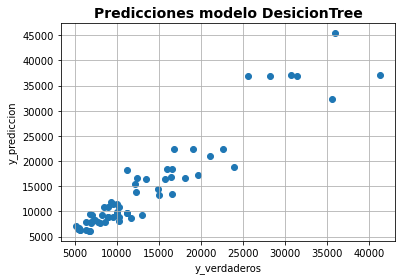

In [37]:
preds = Des_tree.predict(Xts)
plt.scatter(yts,preds)
plt.grid()
plt.title("Predicciones modelo DesicionTree", fontsize = 14, fontweight = 'bold')
plt.xlabel("y_verdaderos")
plt.ylabel("y_prediccion")


In [38]:
Des_tree.score(Xtr, ytr), Des_tree.score(Xts, yts)

(0.999540816553021, 0.8427121807170961)

Se obtienen resultados de predicción mejores en comparación con el modelo lineal.

2.3 Selección de hiperparámetros para el modelo Random Forest

In [39]:
parametros = { 'n_estimators': [5,10,15],
              'max_depth':[5,7,10]}

forest_reg = GridSearchCV(estimator = estimator3,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)
forest_reg.fit(Xtr, ytr)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=RandomForestRegressor(max_depth=5, n_estimators=2),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10], 'n_estimators': [5, 10, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [40]:
print("Mejor estimador Random Forest: ",forest_reg.best_estimator_)
print("Mejores parámetros para el estimador Random Forest: ", forest_reg.best_params_)

Mejor estimador Random Forest:  RandomForestRegressor(max_depth=7, n_estimators=15)
Mejores parámetros para el estimador Random Forest:  {'max_depth': 7, 'n_estimators': 15}


In [41]:
Rand_forest= RandomForestRegressor(n_estimators = 5,max_depth = 10)
Rand_forest.fit(Xtr, ytr)

RandomForestRegressor(max_depth=10, n_estimators=5)

In [42]:
print('RMSLE del Decision Tree en entrenamiento: ',"{:.5f}".format(RMSLE(Rand_forest,Xtr, ytr)))
print('RMSLE del Decision Tree seleccionado: ',"{:.5f}".format(RMSLE(Rand_forest,Xts, yts)))

RMSLE del Decision Tree en entrenamiento:  0.07266
RMSLE del Decision Tree seleccionado:  0.15361


Text(0, 0.5, 'y_prediccion')

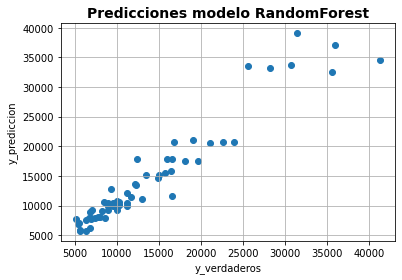

In [43]:
preds = Rand_forest.predict(Xts)
plt.scatter(yts,preds)
plt.grid()
plt.title("Predicciones modelo RandomForest", fontsize = 14, fontweight = 'bold')
plt.xlabel("y_verdaderos")
plt.ylabel("y_prediccion")


In [44]:

print(Rand_forest.score(Xtr, ytr),Rand_forest.score(Xts, yts))

0.983191339162915 0.9115138383889876


2.4 Score en predicción usando los mejores modelos con los mejores hiperparámetros. 

In [45]:
print("Resultados de predicción para los modelos haciendo uso de los mejores hiperparámetros:")

print("---------")
print("DesicionTree:")
print("Mejores parámetros para el estimador Decision Tree: ", decission_tree.best_params_)
print('Score train =',"{:.5f}".format(Des_tree.score(Xtr, ytr)), 'Score test =',"{:.5f}".format(Des_tree.score(Xts, yts)))
print("---------")
print("RandomForest:")
print("Mejores parámetros para el estimador Random Forest: ", forest_reg.best_params_)
print('Score train =',"{:.5f}".format(Rand_forest.score(Xtr, ytr)),'Score test =',"{:.5f}".format(Rand_forest.score(Xts, yts)))

Resultados de predicción para los modelos haciendo uso de los mejores hiperparámetros:
---------
DesicionTree:
Mejores parámetros para el estimador Decision Tree:  {'max_depth': 5}
Score train = 0.99954 Score test = 0.84271
---------
RandomForest:
Mejores parámetros para el estimador Random Forest:  {'max_depth': 7, 'n_estimators': 15}
Score train = 0.98319 Score test = 0.91151


# 3. Modelos no supervisados.

3.1 PCA

In [46]:
from sklearn.decomposition import PCA
components = [1,3,5,7,9]
test_size = 0.3
val_size  = test_size/(1-test_size)
perf = [] #desempeños de los modelos
Rdm_forest = RandomForestRegressor(n_estimators = 5,max_depth = 9)
for i in components:
    pca = PCA(n_components = i)
    X_t = pca.fit_transform(X)
    
    #Partición de datos
    #Xtv, ytv son los datos que se usan para entrenar el modelo
    #Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
    Xtv, Xts, ytv, yts = train_test_split(X_t, y, test_size=test_size)
    print (Xtv.shape, Xts.shape)
    
    Rdm_forest.fit(Xtv, ytv)
    perf.append(RMSLE(Rdm_forest,Xts, yts))
    print('RMSLE del modelo con ', i ,'elementos: ',"{:.5f}".format(RMSLE(Rdm_forest,Xts, yts)))
    print('------------')

print('Mejor RMSLE: ',"{:.5f}".format(np.min(perf)),'  ; obtenido con ',components[np.argmin(perf)],' componentes para PCA')
    

(143, 1) (62, 1)
RMSLE del modelo con  1 elementos:  0.20636
------------
(143, 3) (62, 3)
RMSLE del modelo con  3 elementos:  0.17113
------------
(143, 5) (62, 5)
RMSLE del modelo con  5 elementos:  0.25453
------------
(143, 7) (62, 7)
RMSLE del modelo con  7 elementos:  0.20715
------------
(143, 9) (62, 9)
RMSLE del modelo con  9 elementos:  0.18654
------------
Mejor RMSLE:  0.17113   ; obtenido con  3  componentes para PCA


In [47]:
#MEJOR PCA
pca = PCA(n_components = 7)
X_t1 = pca.fit_transform(X)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(143, 7) (62, 7)


In [48]:

parametros = { 'n_estimators': [5,10,15],
              'max_depth':[5,7,9]}

forest_reg = GridSearchCV(estimator = estimator3,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)
forest_reg.fit(Xtv, ytv)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=RandomForestRegressor(max_depth=5, n_estimators=2),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'n_estimators': [5, 10, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [49]:
print("Mejor estimador Random Forest: ",forest_reg.best_estimator_)
print("Mejores parámetros para el estimador Random Forest: ", forest_reg.best_params_)

Mejor estimador Random Forest:  RandomForestRegressor(max_depth=7, n_estimators=15)
Mejores parámetros para el estimador Random Forest:  {'max_depth': 7, 'n_estimators': 15}


In [50]:
#Mejor random forest para el PCA obtenido
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y, test_size=test_size)
print (Xtv.shape, Xts.shape)
Rdm_forest = RandomForestRegressor(n_estimators = 15,max_depth = 9)
Rdm_forest.fit(Xtv, ytv)

(143, 7) (62, 7)


RandomForestRegressor(max_depth=9, n_estimators=15)

Text(0, 0.5, 'y_prediccion')

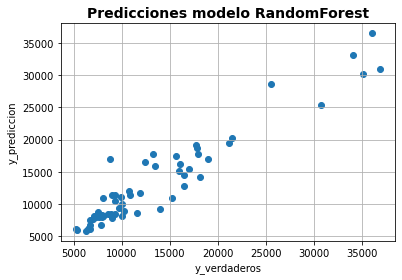

In [51]:
preds = Rdm_forest.predict(Xts)
plt.scatter(yts,preds)
plt.grid()
plt.title("Predicciones modelo RandomForest", fontsize = 14, fontweight = 'bold')
plt.xlabel("y_verdaderos")
plt.ylabel("y_prediccion")


In [52]:
print('RMSLE del Random Forest en entrenamiento: ',"{:.5f}".format(RMSLE(Rdm_forest,Xtv, ytv)))
print('RMSLE del Random Forest seleccionado: ',"{:.5f}".format(RMSLE(Rdm_forest,Xts, yts)))
print('Score train =',"{:.5f}".format(Rdm_forest.score(Xtv, ytv)),'Score test =',"{:.5f}".format(Rdm_forest.score(Xts, yts)))

RMSLE del Random Forest en entrenamiento:  0.07459
RMSLE del Random Forest seleccionado:  0.17022
Score train = 0.96288 Score test = 0.90788


3.2 NMF

In [53]:
from sklearn.decomposition import NMF
components = [1,3,5,7,9]
test_size = 0.3
val_size  = test_size/(1-test_size)
perf = [] #desempeños de los modelos
Des_tree = DecisionTreeRegressor(max_depth=15)
for i in components:
    nmf = NMF(n_components = i)
    X_t = nmf.fit_transform(X)
    
    #Partición de datos
    #Xtv, ytv son los datos que se usan para entrenar el modelo
    #Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
    Xtv, Xts, ytv, yts = train_test_split(X_t, y, test_size=test_size)
    print (Xtv.shape, Xts.shape)
    
    Des_tree.fit(Xtv, ytv)
    perf.append(RMSLE(Des_tree,Xts, yts))
    print('RMSLE del modelo con ', i ,'elementos: ',"{:.5f}".format(RMSLE(Des_tree,Xts, yts)))
    print('------------')

print('Mejor RMSLE: ',"{:.5f}".format(np.min(perf)),'  ; obtenido con ',components[np.argmin(perf)],' componentes para PCA')

(143, 1) (62, 1)
RMSLE del modelo con  1 elementos:  0.29454
------------
(143, 3) (62, 3)
RMSLE del modelo con  3 elementos:  0.20934
------------
(143, 5) (62, 5)
RMSLE del modelo con  5 elementos:  0.24822
------------
(143, 7) (62, 7)
RMSLE del modelo con  7 elementos:  0.27676
------------
(143, 9) (62, 9)
RMSLE del modelo con  9 elementos:  0.22946
------------
Mejor RMSLE:  0.20934   ; obtenido con  3  componentes para PCA


In [54]:
#MEJOR NMF
nmf = NMF(n_components = 3)
X_t2 = nmf.fit_transform(X)
Xtv, Xts, ytv, yts = train_test_split(X_t2, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(143, 3) (62, 3)


In [55]:
#Nota: esta celda requiere de gran tiempo para completarse
parametros = {'max_depth': [2,5,8,12,15]}


decission_tree = GridSearchCV(estimator = estimator2,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

decission_tree.fit(Xtv, ytv)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=DecisionTreeRegressor(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 12, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [56]:
print("Mejor estimador Decision Tree: ",decission_tree.best_estimator_)
print("Mejores parámetros para el estimador Decision Tree: ", decission_tree.best_params_)

Mejor estimador Decision Tree:  DecisionTreeRegressor(max_depth=5)
Mejores parámetros para el estimador Decision Tree:  {'max_depth': 5}


In [57]:
#Mejor Decision Tree para el NMF obtenido
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, Xts, ytv, yts = train_test_split(X_t2, y, test_size=test_size)
print (Xtv.shape, Xts.shape)
Des_tree = DecisionTreeRegressor(max_depth=8)
Des_tree.fit(Xtv, ytv)

(143, 3) (62, 3)


DecisionTreeRegressor(max_depth=8)

Text(0, 0.5, 'y_prediccion')

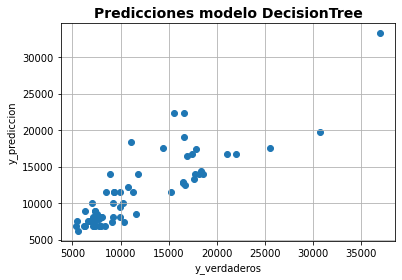

In [58]:
preds = Des_tree.predict(Xts)
plt.scatter(yts,preds)
plt.grid()
plt.title("Predicciones modelo DecisionTree", fontsize = 14, fontweight = 'bold')
plt.xlabel("y_verdaderos")
plt.ylabel("y_prediccion")


In [59]:
print('RMSLE del Decision Tree en entrenamiento: ',"{:.5f}".format(RMSLE(Des_tree,Xtv, ytv)))
print('RMSLE del Decision Tree seleccionado: ',"{:.5f}".format(RMSLE(Des_tree,Xts, yts)))
print('Score train =',"{:.5f}".format(Des_tree.score(Xtv, ytv)),'Score test =',"{:.5f}".format(Des_tree.score(Xts, yts)))

RMSLE del Decision Tree en entrenamiento:  0.08903
RMSLE del Decision Tree seleccionado:  0.22232
Score train = 0.97952 Score test = 0.73038


#4. Curvas de aprendizaje 

4.1 DecisionTree

In [60]:
X=ds.copy()

In [61]:
y = X.pop('price')

In [62]:
test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación


print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtv, ytv son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(205, 9) (205,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(143, 3) (62, 9)


In [63]:
Des_tree1 = DecisionTreeRegressor(max_depth=8)
train_sizes, train_scores, valid_scores = learning_curve(Des_tree1, Xtv, ytv, train_sizes= [0.3, 0.5,0.7,0.9], 
                 scoring ='neg_root_mean_squared_error', cv = ShuffleSplit(n_splits=10, test_size=val_size))

In [64]:
def lc_plot(estimator,X,y):
    train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, train_sizes= [0.3, 0.5,0.7,0.9], 
                 scoring ='neg_root_mean_squared_error', cv = ShuffleSplit(n_splits=10, test_size=val_size))
    
    train_scores = np.abs(train_scores)
    valid_scores = np.abs(valid_scores)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    plt.subplots(1, figsize=(5,5))
    plt.plot(train_sizes, train_mean, '--', color="r",  label="Puntaje entrenamiento")
    plt.plot(train_sizes, valid_mean, color="g", label=" Puntaje Test")



    plt.grid()
    plt.title("Curva de aprendizaje")
    plt.xlabel("Datos enrenamiento"), plt.ylabel("RMSLE"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return plt

In [65]:
Rdm_forest = RandomForestRegressor(n_estimators = 5,max_depth = 7)

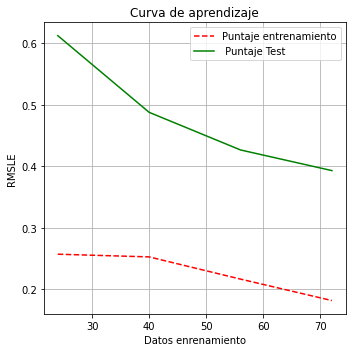

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [66]:
lc_plot(Rdm_forest,Xtr,ytr)

4.2 RandomForest

In [67]:
Rdm_forest = RandomForestRegressor(n_estimators = 5,max_depth = 10)

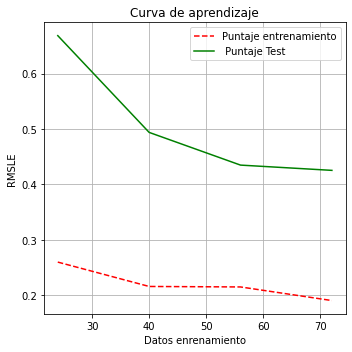

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [68]:
lc_plot(Rdm_forest,Xtr,ytr)

4.3 Métodos no supervisados

4.3.1 PCA + RandomForest

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_t1 = pca.fit_transform(X)
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtr, Xts, ytr, yts = train_test_split(X_t1, y, test_size=test_size)
Rdm_forest = RandomForestRegressor(n_estimators = 5,max_depth = 5)

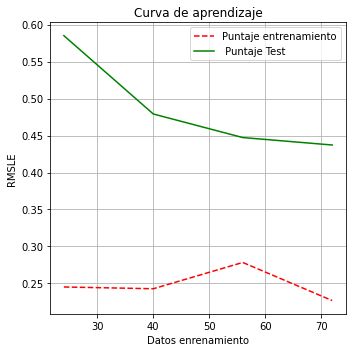

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [70]:
lc_plot(Rdm_forest,Xtr,ytr)

4.3.2 NMF + DesicionTree

In [71]:
X=ds2.copy()

In [72]:
y = X.pop('price')

In [73]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 3)
X_t2 = nmf.fit_transform(X)
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, Xts, ytv, yts = train_test_split(X_t2, y, test_size=test_size)
Des_tree = DecisionTreeRegressor(max_depth=15)

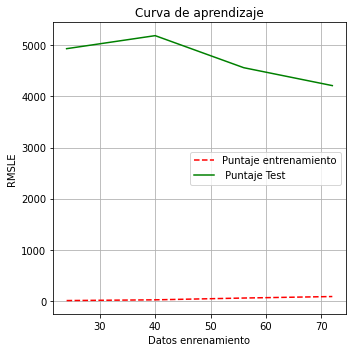

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [74]:
lc_plot(Des_tree,Xtv,ytv)